In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

In [2]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
test_example = pd.read_csv('data/test.predictions_example.csv')

In [3]:
test.isnull().sum()

Request    0
dtype: int64

In [4]:
train.isnull().sum()

Request    272
Label        0
dtype: int64

In [5]:
train.head()

,Request,Label
0,Adicionar música tomohisa yamashita à minha li...,add_to_playlist
1,Eu quero adicionando Aprite le finestre à minh...,add_to_playlist
2,Que curta-metragens estão tocando às 11 da man...,search_screening_event
3,precisa de uma sala em um que serve foie gras ...,book_restaurant
4,"Atribuir 4 estrelas de 6 para a crônica, Deus ...",rate_book


In [6]:
len(test)

1984

In [7]:
len(train)

26799

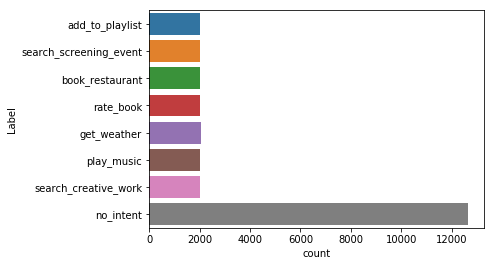

In [8]:
sns.countplot(data=train, y='Label')

In [9]:
train.tail(50)

,Request,Label
26749,"Vamos ver a loja do Sr. Chowdry, e Suzette pod...",no_intent
26750,"Vamos ver se me tornarei duquesa, ou se não pa...",no_intent
26751,É uma perguntar para qual talvez não tenhamos ...,no_intent
26752,"Vai ter a festa de Natal, mas podemos conversar.",no_intent
26753,Vamos fazer uma li de chamada antes das senhor...,no_intent
26754,"É que... digo, eu não queria o Vinnie Van Lowe...",no_intent
26755,Preciso chegar lá dentro e materializar a orig...,no_intent
26756,É magnífico dedicar algum intervalo à si mesma...,no_intent
26757,É por não poder jogar futebol?,no_intent
26758,"Vamos fazer um show na festa de Gina, sábado à...",no_intent


In [18]:
def drop_nulls(train_data):

    return train_data[train_data['Request'].notnull()]

train = drop_nulls(train)
train.isnull().sum()

Request    0
Label      0
dtype: int64

In [19]:
train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

In [20]:
train_X, train_y = train_data['Request'], train_data['Label']

In [21]:
val_X, val_y = val_data['Request'], val_data['Label']

In [22]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(random_state=42))])

In [23]:
text_clf.fit(train_X, train_y)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])

In [24]:
accuracy_score(val_y, text_clf.predict(val_X))

0.87957029777610252